![Github_top](https://user-images.githubusercontent.com/33735397/206313977-e67ba652-3340-4a1b-b1d1-141d8d5001f2.PNG)

# Welcome to the Community Streamflow Evaluation System (CSES)

National-scale streamflow modeling remains a modern challenge, as changes in the underlying hydrology from land use and land cover (LULC) change, anthropogenic streamflow modification, and general process components (reach length, hydrogeophysical processes, precipitation, temperature, etc) greatly influence  hydrological modeling.
In a changing climate, there is a need to anticipate flood intensity, impacts of groundwater depletion on streamflow, western mountain low-flow events, eastern rain-on-snow events, storm-induced flooding, and other severe environmental problems that challenge the management of water resources.
Given the National Water Model (NWM) bridges the gap between the spatially coarse USGS streamflow observations by providing a near-continuous 2.7 million reach predictions of streamflow, there lies the potential to improve upon the capabilities of the model by characterizing predictive performance across the heterogeneity of processes and land covers present at the national scale. 
The Python-based Research-Oriented Streamflow Evaluation Tool (ROSET) package provides a tool to evaluate national hydrography dataset (nhd) based model outputs with colocated USGS/NWIS streamflow monitoring stations (parameter: 060). 
The package contains three key methods for evaluation: state-based LULC, HUC level analysis, and USGS station-based analysis.
Below is a description of each method and application.
While designed to use the NWM version 2.1 retrospective dataset, with minimal modification the tool should be able to take in other model formulations.
By using the ROSET, researchers can identify locations where a model may benefit from further training/calibration/parameterization or a need for new model processes/features (e.g., integration of reservoir release operations) to ultimately create new post-processing methods and/or hydrological modeling formulations to improve streamflow prediction capabilities with respect to modeling needs (e.g., stormflow, supply, emergency management, flooding, etc).   


In [2]:
from Community_Eval_Methods import HUC_Eval
import os
import warnings
warnings.filterwarnings("ignore")
#set path directory
cwd = os.getcwd()

Use State_Eval.Eval.NWIS_site_id if you would like to get the respective NWIS/Modeled site/reaches to plug into the Reach Evaluator class

# Streamflow evaluation: HUC Class

This section of code allows the user to evaluate modeled streamflow with observed in situ NWIS monitoring sites 
for a watershed(s) of interest. The user can input multiple watersheds (e.g., Great Salt lake: ['1601', '1602']).
Enter a start date, end date, watersheds and model to compare (NWM v2.1 is set up).
NWM retrospective data spans from 1980 - 2020, USGS/NWIS data is location dependent

Use [The National Map Watershed Boundary Dataset (WBD)]() to identify the HUC size and unit code of interestto locate HUC of interest.

![HUC_Eval_top](https://user-images.githubusercontent.com/33735397/206322410-ea0e210c-c805-4599-ad6b-704c76ba42ce.PNG)


In [3]:
#Enter a starting date, model for evaluation, and the respective HUC id(s)

startDT ='2015-4-01'
endDT ='2015-10-31'
model = 'NWM_v2.1'
HUCids = ['1601', '1602'] #must be in brackets, add multiple HUCs to complete a watershed (e.g. GSL basin), East vs. West. etc
#0802 causing issues, is the state there?
#Initiate function
HUC_Eval = HUC_Eval.HUC_Eval(model, HUCids, startDT, endDT, cwd)


In [4]:
#Match NWIS locations within HUC watershed
HUC_Eval.Join_WBD_StreamStats()

Getting geospatial information for HUC:  ['1601', '1602']
['1601', '1602']
Finding NWIS monitoring stations within  ['1601', '1602']  watershed boundary
Creating dataframe of NWIS stations within  ['1601', '1602']  watershed boundary


In [5]:
#Get NWM reaches for each NWIS monitoring station
HUC_Eval.get_NHD_Model_info()

#Get NWM and NWIS data to compare
HUC_Eval.prepare_comparison() # run the apply function to not have to run it during evaluation

Getting collocated  NWM_v2.1  NHD reaches with NWIS monitoring locations


Getting  NWM_v2.1  data


100% |########################################################################|


Getting NWIS data


100% |########################################################################|


## Interactive plotting on map
Set frequency for graph:
* <span style="color:red">'D'</span>: Daily
* <span style="color:red">'M'</span>: monthly, 
* <span style="color:red">'Q'</span>: quarterly, 
* <span style="color:red">'A'</span>: annual

Set supply = <span style="color:green"> **True** </span> to evaluate cumulative water year totals or <span style = "color:green"> **False** </span> to look at desired temporal resolution

In [6]:
#Run Map function
HUC_Eval.Map_Plot_Eval('D', supply = True)

Plotting monitoring station locations


## Interactive time series plotting
Set frequency for graph:
* <span style="color:red">'D'</span>: Daily
* <span style="color:red">'M'</span>: monthly, 
* <span style="color:red">'Q'</span>: quarterly, 
* <span style="color:red">'A'</span>: annual

Set supply = <span style="color:green"> **True** </span> to evaluate cumulative water year totals or <span style = "color:green"> **False** </span> to look at desired temporal resolution

NWIS_site_id  NHD_reachid  \
0      10011500      7887898   
1      10154200     10373692   
2      10155000     10373622   
3      10149400     10349220   
4      10131000     10093066   
5      10172870     10683178   
6      10128500     10093110   
7      10153100     10348934   
8      10109000       664424   
9      10146000     10330245   
10     10023000      7880800   
11     10133600     10276878   
12     10145400     10331031   
13     10150500     10349360   
14     10137500     10274270   
15     10132500     10089426   
16     10156000     10375650   
17     10105900       666170   
18     10149000     10349162   
19     10155500     10375648   
20     10155200     10373794   
21     10140700     10274376   
22     10132000     10093052   
23     10168000     10389562   
24     10126000      4605050   
25     10134500     10277268   
26     10133800     10276836   
27     10172800     10395905   
28     10133650     10276856   
29     10140100     10275828   
30     10164500     10329013   
31     10133980     10276712   
32     10136500     10274616   
33     10130500     10092262   
34     10129500     10093214   
35     10172952      1169706   
36     10146400     10331001   
37     10113500       666156   
38     10129900     10093082   
39     10172700     10396937   
40     10163000     10376596   
41     10166430     10327201   
42     10092700      4560060   
43     10068500      4472049   
44     10141000     10273232   
45     10171000     10390290   
46     10039500      7898927   
47     10172727     10396113   
48     10157500     10375690   

                                             Location   RMSE  MaxError  \
0             BEAR RIVER NEAR UTAH-WYOMING STATE LINE     93       289   
1                       PROVO RIVER NEAR WOODLAND, UT    125       380   
2                      PROVO RIVER NEAR HAILSTONE, UT    205       828   
3          DIAMOND FORK ABV RED HOLLOW NR THISTLE, UT     20        94   
4                        CHALK CREEK AT COALVILLE, UT     30        97   
5                         TROUT CREEK NEAR CALLAO, UT      4        19   
6                         WEBER RIVER NEAR OAKLEY, UT    143       473   
7      HOBBLE CREEK AT 1650 WEST AT SPRINGVILLE, UTAH     21        55   
8         LOGAN RIVER ABOVE STATE DAM, NEAR LOGAN, UT    124       497   
9                             SALT CREEK AT NEPHI, UT      3        12   
10                        BIG CREEK NEAR RANDOLPH, UT      3        11   
11                    MCLEOD CREEK NEAR PARK CITY, UT      7        12   
12      SALT CRK BL NEPHI POWERPLANT DIV NR NEPHI, UT      4        16   
13                       SPANISH FORK AT CASTILLA, UT    151       295   
14         SOUTH FORK OGDEN RIVER NEAR HUNTSVILLE, UT     52       198   
15                      LOST CREEK NEAR CROYDON, UTAH     16        29   
16                    SNAKE CREEK NEAR CHARLESTON, UT     21        41   
17                  LITTLE BEAR RIVER AT PARADISE, UT     35        96   
18     SIXTH WATER CRK AB SYAR TUN NR SPRINGVILLE, UT     25       177   
19                    PROVO RIVER NEAR CHARLESTON, UT    334       846   
20     PROVO RIV AT RIV ROAD BRIDGE NR HEBER CITY, UT    349       899   
21          OGDEN RIVER NR GIBSON AVENUE AT OGDEN, UT    143       244   
22                            WEBER RIVER AT ECHO, UT    565      1447   
23      LITTLE COTTONWOOD CREEK @ JORDAN RIVER NR SLC    108       274   
24                        BEAR RIVER NEAR CORINNE, UT   1770      2951   
25                  EAST CANYON CREEK NEAR MORGAN, UT    131       191   
26            EAST CANYON CREEK NEAR JEREMY RANCH, UT     57        72   
27            SOUTH WILLOW CREEK NEAR GRANTSVILLE, UT     19        76   
28     E CANYON CR BL I-80 REST STOP NR PARK CITY, UT     38        54   
29      OGDEN RIVER BL PINEVIEW RES NR HUNTSVILLE, UT    164       280   
30  AMERICAN FK AB UPPER POWERPLANT NR AMERICAN FK...    139       461   
31  EAST CANYON CREEK AB EAST CYN 

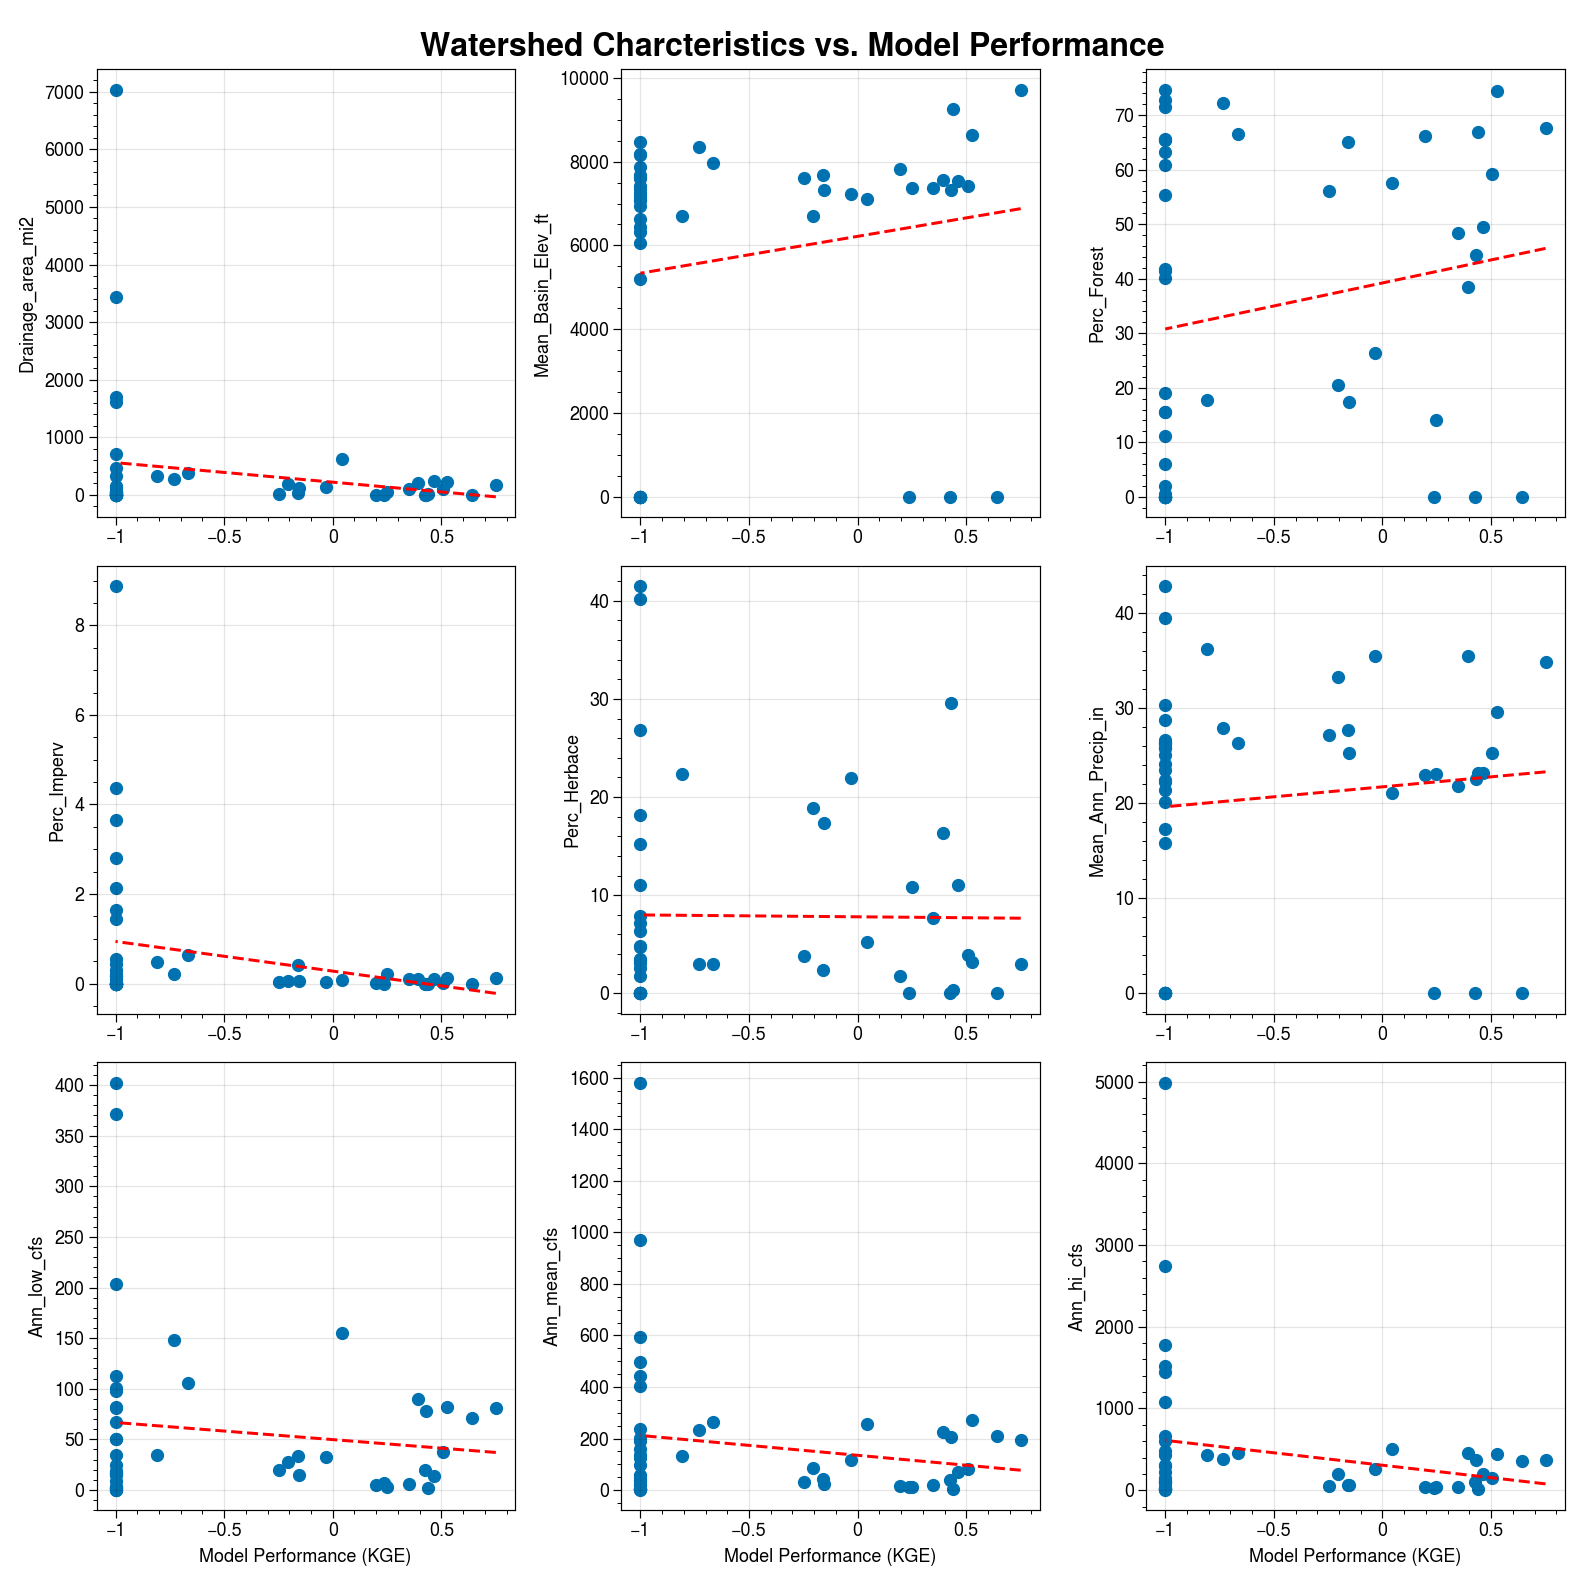

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10011500                  :Curve   [DateTime]   (Discharge (cfs))
      .Curve.NWM_v2_full_stop_1_colon_NHD_7887898 :Curve   [DateTime]   (Discharge (cfs))
      .Rectangles.I                               :Rectangles   [x0,y0,x1,y1]
      .Text.I                                     :Text   [x,y]
      .Text.II                                    :Text   [x,y]
      .Text.III                                   :Text   [x,y]
      .Text.IV                                    :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (cfs)]   (NWM_v2.1 Discharge (cfs))
      .Curve.I   :Curve   [x]   (y)

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10154200                   :Curve   [DateTime]   (Discharge (cfs))
      .Curve.NWM_v2_full_stop_1_colon_NHD_10373692 :Curve   [DateTime]   (Discharge (cfs))
      .Rectangles.I                                :Rectangles   [x0,y0,x1,y1]
      .Text.I                                      :Text   [x,y]
      .Text.II                                     :Text   [x,y]
      .Text.III                                    :Text   [x,y]
      .Text.IV                                     :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (cfs)]   (NWM_v2.1 Discharge (cfs))
      .Curve.I   :Curve   [x]   (y)

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10155000                   :Curve   [DateTime]   (Discharge (cfs))
      .Curve.NWM_v2_full_stop_1_colon_NHD_10373622 :Curve   [DateTime]   (Discharge (cfs))
      .Rectangles.I                                :Rectangles   [x0,y0,x1,y1]
      .Text.I                                      :Text   [x,y]
      .Text.II                                     :Text   [x,y]
      .Text.III                                    :Text   [x,y]
      .Text.IV                                     :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (cfs)]   (NWM_v2.1 Discharge (cfs))
      .Curve.I   :Curve   [x]   (y)

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10149400                   :Curve   [DateTime]   (Discharge (cfs))
      .Curve.NWM_v2_full_stop_1_colon_NHD_10349220 :Curve   [DateTime]   (Discharge (cfs))
      .Rectangles.I                                :Rectangles   [x0,y0,x1,y1]
      .Text.I                                      :Text   [x,y]
      .Text.II                                     :Text   [x,y]
      .Text.III                                    :Text   [x,y]
      .Text.IV                                     :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (cfs)]   (NWM_v2.1 Discharge (cfs))
      .Curve.I   :Curve   [x]   (y)

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10131000                   :Curve   [DateTime]   (Discharge (cfs))
      .Curve.NWM_v2_full_stop_1_colon_NHD_10093066 :Curve   [DateTime]   (Discharge (cfs))
      .Rectangles.I                                :Rectangles   [x0,y0,x1,y1]
      .Text.I                                      :Text   [x,y]
      .Text.II                                     :Text   [x,y]
      .Text.III                                    :Text   [x,y]
      .Text.IV                                     :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (cfs)]   (NWM_v2.1 Discharge (cfs))
      .Curve.I   :Curve   [x]   (y)

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10172870                   :Curve   [DateTime]   (Discharge (cfs))
      .Curve.NWM_v2_full_stop_1_colon_NHD_10683178 :Curve   [DateTime]   (Discharge (cfs))
      .Rectangles.I                                :Rectangles   [x0,y0,x1,y1]
      .Text.I                                      :Text   [x,y]
      .Text.II                                     :Text   [x,y]
      .Text.III                                    :Text   [x,y]
      .Text.IV                                     :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (cfs)]   (NWM_v2.1 Discharge (cfs))
      .Curve.I   :Curve   [x]   (y)

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10128500                   :Curve   [DateTime]   (Discharge (cfs))
      .Curve.NWM_v2_full_stop_1_colon_NHD_10093110 :Curve   [DateTime]   (Discharge (cfs))
      .Rectangles.I                                :Rectangles   [x0,y0,x1,y1]
      .Text.I                                      :Text   [x,y]
      .Text.II                                     :Text   [x,y]
      .Text.III                                    :Text   [x,y]
      .Text.IV                                     :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (cfs)]   (NWM_v2.1 Discharge (cfs))
      .Curve.I   :Curve   [x]   (y)

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10153100                   :Curve   [DateTime]   (Discharge (cfs))
      .Curve.NWM_v2_full_stop_1_colon_NHD_10348934 :Curve   [DateTime]   (Discharge (cfs))
      .Rectangles.I                                :Rectangles   [x0,y0,x1,y1]
      .Text.I                                      :Text   [x,y]
      .Text.II                                     :Text   [x,y]
      .Text.III                                    :Text   [x,y]
      .Text.IV                                     :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (cfs)]   (NWM_v2.1 Discharge (cfs))
      .Curve.I   :Curve   [x]   (y)

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10109000                 :Curve   [DateTime]   (Discharge (cfs))
      .Curve.NWM_v2_full_stop_1_colon_NHD_664424 :Curve   [DateTime]   (Discharge (cfs))
      .Rectangles.I                              :Rectangles   [x0,y0,x1,y1]
      .Text.I                                    :Text   [x,y]
      .Text.II                                   :Text   [x,y]
      .Text.III                                  :Text   [x,y]
      .Text.IV                                   :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (cfs)]   (NWM_v2.1 Discharge (cfs))
      .Curve.I   :Curve   [x]   (y)

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10146000                   :Curve   [DateTime]   (Discharge (cfs))
      .Curve.NWM_v2_full_stop_1_colon_NHD_10330245 :Curve   [DateTime]   (Discharge (cfs))
      .Rectangles.I                                :Rectangles   [x0,y0,x1,y1]
      .Text.I                                      :Text   [x,y]
      .Text.II                                     :Text   [x,y]
      .Text.III                                    :Text   [x,y]
      .Text.IV                                     :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (cfs)]   (NWM_v2.1 Discharge (cfs))
      .Curve.I   :Curve   [x]   (y)

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10023000                  :Curve   [DateTime]   (Discharge (cfs))
      .Curve.NWM_v2_full_stop_1_colon_NHD_7880800 :Curve   [DateTime]   (Discharge (cfs))
      .Rectangles.I                               :Rectangles   [x0,y0,x1,y1]
      .Text.I                                     :Text   [x,y]
      .Text.II                                    :Text   [x,y]
      .Text.III                                   :Text   [x,y]
      .Text.IV                                    :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (cfs)]   (NWM_v2.1 Discharge (cfs))
      .Curve.I   :Curve   [x]   (y)

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10133600                   :Curve   [DateTime]   (Discharge (cfs))
      .Curve.NWM_v2_full_stop_1_colon_NHD_10276878 :Curve   [DateTime]   (Discharge (cfs))
      .Rectangles.I                                :Rectangles   [x0,y0,x1,y1]
      .Text.I                                      :Text   [x,y]
      .Text.II                                     :Text   [x,y]
      .Text.III                                    :Text   [x,y]
      .Text.IV                                     :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (cfs)]   (NWM_v2.1 Discharge (cfs))
      .Curve.I   :Curve   [x]   (y)

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10145400                   :Curve   [DateTime]   (Discharge (cfs))
      .Curve.NWM_v2_full_stop_1_colon_NHD_10331031 :Curve   [DateTime]   (Discharge (cfs))
      .Rectangles.I                                :Rectangles   [x0,y0,x1,y1]
      .Text.I                                      :Text   [x,y]
      .Text.II                                     :Text   [x,y]
      .Text.III                                    :Text   [x,y]
      .Text.IV                                     :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (cfs)]   (NWM_v2.1 Discharge (cfs))
      .Curve.I   :Curve   [x]   (y)

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10150500                   :Curve   [DateTime]   (Discharge (cfs))
      .Curve.NWM_v2_full_stop_1_colon_NHD_10349360 :Curve   [DateTime]   (Discharge (cfs))
      .Rectangles.I                                :Rectangles   [x0,y0,x1,y1]
      .Text.I                                      :Text   [x,y]
      .Text.II                                     :Text   [x,y]
      .Text.III                                    :Text   [x,y]
      .Text.IV                                     :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (cfs)]   (NWM_v2.1 Discharge (cfs))
      .Curve.I   :Curve   [x]   (y)

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10137500                   :Curve   [DateTime]   (Discharge (cfs))
      .Curve.NWM_v2_full_stop_1_colon_NHD_10274270 :Curve   [DateTime]   (Discharge (cfs))
      .Rectangles.I                                :Rectangles   [x0,y0,x1,y1]
      .Text.I                                      :Text   [x,y]
      .Text.II                                     :Text   [x,y]
      .Text.III                                    :Text   [x,y]
      .Text.IV                                     :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (cfs)]   (NWM_v2.1 Discharge (cfs))
      .Curve.I   :Curve   [x]   (y)

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10132500                   :Curve   [DateTime]   (Discharge (cfs))
      .Curve.NWM_v2_full_stop_1_colon_NHD_10089426 :Curve   [DateTime]   (Discharge (cfs))
      .Rectangles.I                                :Rectangles   [x0,y0,x1,y1]
      .Text.I                                      :Text   [x,y]
      .Text.II                                     :Text   [x,y]
      .Text.III                                    :Text   [x,y]
      .Text.IV                                     :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (cfs)]   (NWM_v2.1 Discharge (cfs))
      .Curve.I   :Curve   [x]   (y)

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10156000                   :Curve   [DateTime]   (Discharge (cfs))
      .Curve.NWM_v2_full_stop_1_colon_NHD_10375650 :Curve   [DateTime]   (Discharge (cfs))
      .Rectangles.I                                :Rectangles   [x0,y0,x1,y1]
      .Text.I                                      :Text   [x,y]
      .Text.II                                     :Text   [x,y]
      .Text.III                                    :Text   [x,y]
      .Text.IV                                     :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (cfs)]   (NWM_v2.1 Discharge (cfs))
      .Curve.I   :Curve   [x]   (y)

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10105900                 :Curve   [DateTime]   (Discharge (cfs))
      .Curve.NWM_v2_full_stop_1_colon_NHD_666170 :Curve   [DateTime]   (Discharge (cfs))
      .Rectangles.I                              :Rectangles   [x0,y0,x1,y1]
      .Text.I                                    :Text   [x,y]
      .Text.II                                   :Text   [x,y]
      .Text.III                                  :Text   [x,y]
      .Text.IV                                   :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (cfs)]   (NWM_v2.1 Discharge (cfs))
      .Curve.I   :Curve   [x]   (y)

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10149000                   :Curve   [DateTime]   (Discharge (cfs))
      .Curve.NWM_v2_full_stop_1_colon_NHD_10349162 :Curve   [DateTime]   (Discharge (cfs))
      .Rectangles.I                                :Rectangles   [x0,y0,x1,y1]
      .Text.I                                      :Text   [x,y]
      .Text.II                                     :Text   [x,y]
      .Text.III                                    :Text   [x,y]
      .Text.IV                                     :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (cfs)]   (NWM_v2.1 Discharge (cfs))
      .Curve.I   :Curve   [x]   (y)

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10155500                   :Curve   [DateTime]   (Discharge (cfs))
      .Curve.NWM_v2_full_stop_1_colon_NHD_10375648 :Curve   [DateTime]   (Discharge (cfs))
      .Rectangles.I                                :Rectangles   [x0,y0,x1,y1]
      .Text.I                                      :Text   [x,y]
      .Text.II                                     :Text   [x,y]
      .Text.III                                    :Text   [x,y]
      .Text.IV                                     :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (cfs)]   (NWM_v2.1 Discharge (cfs))
      .Curve.I   :Curve   [x]   (y)

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10155200                   :Curve   [DateTime]   (Discharge (cfs))
      .Curve.NWM_v2_full_stop_1_colon_NHD_10373794 :Curve   [DateTime]   (Discharge (cfs))
      .Rectangles.I                                :Rectangles   [x0,y0,x1,y1]
      .Text.I                                      :Text   [x,y]
      .Text.II                                     :Text   [x,y]
      .Text.III                                    :Text   [x,y]
      .Text.IV                                     :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (cfs)]   (NWM_v2.1 Discharge (cfs))
      .Curve.I   :Curve   [x]   (y)

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10140700                   :Curve   [DateTime]   (Discharge (cfs))
      .Curve.NWM_v2_full_stop_1_colon_NHD_10274376 :Curve   [DateTime]   (Discharge (cfs))
      .Rectangles.I                                :Rectangles   [x0,y0,x1,y1]
      .Text.I                                      :Text   [x,y]
      .Text.II                                     :Text   [x,y]
      .Text.III                                    :Text   [x,y]
      .Text.IV                                     :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (cfs)]   (NWM_v2.1 Discharge (cfs))
      .Curve.I   :Curve   [x]   (y)

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10132000                   :Curve   [DateTime]   (Discharge (cfs))
      .Curve.NWM_v2_full_stop_1_colon_NHD_10093052 :Curve   [DateTime]   (Discharge (cfs))
      .Rectangles.I                                :Rectangles   [x0,y0,x1,y1]
      .Text.I                                      :Text   [x,y]
      .Text.II                                     :Text   [x,y]
      .Text.III                                    :Text   [x,y]
      .Text.IV                                     :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (cfs)]   (NWM_v2.1 Discharge (cfs))
      .Curve.I   :Curve   [x]   (y)

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10168000                   :Curve   [DateTime]   (Discharge (cfs))
      .Curve.NWM_v2_full_stop_1_colon_NHD_10389562 :Curve   [DateTime]   (Discharge (cfs))
      .Rectangles.I                                :Rectangles   [x0,y0,x1,y1]
      .Text.I                                      :Text   [x,y]
      .Text.II                                     :Text   [x,y]
      .Text.III                                    :Text   [x,y]
      .Text.IV                                     :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (cfs)]   (NWM_v2.1 Discharge (cfs))
      .Curve.I   :Curve   [x]   (y)

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10126000                  :Curve   [DateTime]   (Discharge (cfs))
      .Curve.NWM_v2_full_stop_1_colon_NHD_4605050 :Curve   [DateTime]   (Discharge (cfs))
      .Rectangles.I                               :Rectangles   [x0,y0,x1,y1]
      .Text.I                                     :Text   [x,y]
      .Text.II                                    :Text   [x,y]
      .Text.III                                   :Text   [x,y]
      .Text.IV                                    :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (cfs)]   (NWM_v2.1 Discharge (cfs))
      .Curve.I   :Curve   [x]   (y)

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10134500                   :Curve   [DateTime]   (Discharge (cfs))
      .Curve.NWM_v2_full_stop_1_colon_NHD_10277268 :Curve   [DateTime]   (Discharge (cfs))
      .Rectangles.I                                :Rectangles   [x0,y0,x1,y1]
      .Text.I                                      :Text   [x,y]
      .Text.II                                     :Text   [x,y]
      .Text.III                                    :Text   [x,y]
      .Text.IV                                     :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (cfs)]   (NWM_v2.1 Discharge (cfs))
      .Curve.I   :Curve   [x]   (y)

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10133800                   :Curve   [DateTime]   (Discharge (cfs))
      .Curve.NWM_v2_full_stop_1_colon_NHD_10276836 :Curve   [DateTime]   (Discharge (cfs))
      .Rectangles.I                                :Rectangles   [x0,y0,x1,y1]
      .Text.I                                      :Text   [x,y]
      .Text.II                                     :Text   [x,y]
      .Text.III                                    :Text   [x,y]
      .Text.IV                                     :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (cfs)]   (NWM_v2.1 Discharge (cfs))
      .Curve.I   :Curve   [x]   (y)

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10172800                   :Curve   [DateTime]   (Discharge (cfs))
      .Curve.NWM_v2_full_stop_1_colon_NHD_10395905 :Curve   [DateTime]   (Discharge (cfs))
      .Rectangles.I                                :Rectangles   [x0,y0,x1,y1]
      .Text.I                                      :Text   [x,y]
      .Text.II                                     :Text   [x,y]
      .Text.III                                    :Text   [x,y]
      .Text.IV                                     :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (cfs)]   (NWM_v2.1 Discharge (cfs))
      .Curve.I   :Curve   [x]   (y)

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10133650                   :Curve   [DateTime]   (Discharge (cfs))
      .Curve.NWM_v2_full_stop_1_colon_NHD_10276856 :Curve   [DateTime]   (Discharge (cfs))
      .Rectangles.I                                :Rectangles   [x0,y0,x1,y1]
      .Text.I                                      :Text   [x,y]
      .Text.II                                     :Text   [x,y]
      .Text.III                                    :Text   [x,y]
      .Text.IV                                     :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (cfs)]   (NWM_v2.1 Discharge (cfs))
      .Curve.I   :Curve   [x]   (y)

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10140100                   :Curve   [DateTime]   (Discharge (cfs))
      .Curve.NWM_v2_full_stop_1_colon_NHD_10275828 :Curve   [DateTime]   (Discharge (cfs))
      .Rectangles.I                                :Rectangles   [x0,y0,x1,y1]
      .Text.I                                      :Text   [x,y]
      .Text.II                                     :Text   [x,y]
      .Text.III                                    :Text   [x,y]
      .Text.IV                                     :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (cfs)]   (NWM_v2.1 Discharge (cfs))
      .Curve.I   :Curve   [x]   (y)

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10164500                   :Curve   [DateTime]   (Discharge (cfs))
      .Curve.NWM_v2_full_stop_1_colon_NHD_10329013 :Curve   [DateTime]   (Discharge (cfs))
      .Rectangles.I                                :Rectangles   [x0,y0,x1,y1]
      .Text.I                                      :Text   [x,y]
      .Text.II                                     :Text   [x,y]
      .Text.III                                    :Text   [x,y]
      .Text.IV                                     :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (cfs)]   (NWM_v2.1 Discharge (cfs))
      .Curve.I   :Curve   [x]   (y)

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10133980                   :Curve   [DateTime]   (Discharge (cfs))
      .Curve.NWM_v2_full_stop_1_colon_NHD_10276712 :Curve   [DateTime]   (Discharge (cfs))
      .Rectangles.I                                :Rectangles   [x0,y0,x1,y1]
      .Text.I                                      :Text   [x,y]
      .Text.II                                     :Text   [x,y]
      .Text.III                                    :Text   [x,y]
      .Text.IV                                     :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (cfs)]   (NWM_v2.1 Discharge (cfs))
      .Curve.I   :Curve   [x]   (y)

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10136500                   :Curve   [DateTime]   (Discharge (cfs))
      .Curve.NWM_v2_full_stop_1_colon_NHD_10274616 :Curve   [DateTime]   (Discharge (cfs))
      .Rectangles.I                                :Rectangles   [x0,y0,x1,y1]
      .Text.I                                      :Text   [x,y]
      .Text.II                                     :Text   [x,y]
      .Text.III                                    :Text   [x,y]
      .Text.IV                                     :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (cfs)]   (NWM_v2.1 Discharge (cfs))
      .Curve.I   :Curve   [x]   (y)

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10130500                   :Curve   [DateTime]   (Discharge (cfs))
      .Curve.NWM_v2_full_stop_1_colon_NHD_10092262 :Curve   [DateTime]   (Discharge (cfs))
      .Rectangles.I                                :Rectangles   [x0,y0,x1,y1]
      .Text.I                                      :Text   [x,y]
      .Text.II                                     :Text   [x,y]
      .Text.III                                    :Text   [x,y]
      .Text.IV                                     :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (cfs)]   (NWM_v2.1 Discharge (cfs))
      .Curve.I   :Curve   [x]   (y)

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10129500                   :Curve   [DateTime]   (Discharge (cfs))
      .Curve.NWM_v2_full_stop_1_colon_NHD_10093214 :Curve   [DateTime]   (Discharge (cfs))
      .Rectangles.I                                :Rectangles   [x0,y0,x1,y1]
      .Text.I                                      :Text   [x,y]
      .Text.II                                     :Text   [x,y]
      .Text.III                                    :Text   [x,y]
      .Text.IV                                     :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (cfs)]   (NWM_v2.1 Discharge (cfs))
      .Curve.I   :Curve   [x]   (y)

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10172952                  :Curve   [DateTime]   (Discharge (cfs))
      .Curve.NWM_v2_full_stop_1_colon_NHD_1169706 :Curve   [DateTime]   (Discharge (cfs))
      .Rectangles.I                               :Rectangles   [x0,y0,x1,y1]
      .Text.I                                     :Text   [x,y]
      .Text.II                                    :Text   [x,y]
      .Text.III                                   :Text   [x,y]
      .Text.IV                                    :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (cfs)]   (NWM_v2.1 Discharge (cfs))
      .Curve.I   :Curve   [x]   (y)

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10146400                   :Curve   [DateTime]   (Discharge (cfs))
      .Curve.NWM_v2_full_stop_1_colon_NHD_10331001 :Curve   [DateTime]   (Discharge (cfs))
      .Rectangles.I                                :Rectangles   [x0,y0,x1,y1]
      .Text.I                                      :Text   [x,y]
      .Text.II                                     :Text   [x,y]
      .Text.III                                    :Text   [x,y]
      .Text.IV                                     :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (cfs)]   (NWM_v2.1 Discharge (cfs))
      .Curve.I   :Curve   [x]   (y)

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10113500                 :Curve   [DateTime]   (Discharge (cfs))
      .Curve.NWM_v2_full_stop_1_colon_NHD_666156 :Curve   [DateTime]   (Discharge (cfs))
      .Rectangles.I                              :Rectangles   [x0,y0,x1,y1]
      .Text.I                                    :Text   [x,y]
      .Text.II                                   :Text   [x,y]
      .Text.III                                  :Text   [x,y]
      .Text.IV                                   :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (cfs)]   (NWM_v2.1 Discharge (cfs))
      .Curve.I   :Curve   [x]   (y)

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10129900                   :Curve   [DateTime]   (Discharge (cfs))
      .Curve.NWM_v2_full_stop_1_colon_NHD_10093082 :Curve   [DateTime]   (Discharge (cfs))
      .Rectangles.I                                :Rectangles   [x0,y0,x1,y1]
      .Text.I                                      :Text   [x,y]
      .Text.II                                     :Text   [x,y]
      .Text.III                                    :Text   [x,y]
      .Text.IV                                     :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (cfs)]   (NWM_v2.1 Discharge (cfs))
      .Curve.I   :Curve   [x]   (y)

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10172700                   :Curve   [DateTime]   (Discharge (cfs))
      .Curve.NWM_v2_full_stop_1_colon_NHD_10396937 :Curve   [DateTime]   (Discharge (cfs))
      .Rectangles.I                                :Rectangles   [x0,y0,x1,y1]
      .Text.I                                      :Text   [x,y]
      .Text.II                                     :Text   [x,y]
      .Text.III                                    :Text   [x,y]
      .Text.IV                                     :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (cfs)]   (NWM_v2.1 Discharge (cfs))
      .Curve.I   :Curve   [x]   (y)

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10163000                   :Curve   [DateTime]   (Discharge (cfs))
      .Curve.NWM_v2_full_stop_1_colon_NHD_10376596 :Curve   [DateTime]   (Discharge (cfs))
      .Rectangles.I                                :Rectangles   [x0,y0,x1,y1]
      .Text.I                                      :Text   [x,y]
      .Text.II                                     :Text   [x,y]
      .Text.III                                    :Text   [x,y]
      .Text.IV                                     :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (cfs)]   (NWM_v2.1 Discharge (cfs))
      .Curve.I   :Curve   [x]   (y)

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10166430                   :Curve   [DateTime]   (Discharge (cfs))
      .Curve.NWM_v2_full_stop_1_colon_NHD_10327201 :Curve   [DateTime]   (Discharge (cfs))
      .Rectangles.I                                :Rectangles   [x0,y0,x1,y1]
      .Text.I                                      :Text   [x,y]
      .Text.II                                     :Text   [x,y]
      .Text.III                                    :Text   [x,y]
      .Text.IV                                     :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (cfs)]   (NWM_v2.1 Discharge (cfs))
      .Curve.I   :Curve   [x]   (y)

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10092700                  :Curve   [DateTime]   (Discharge (cfs))
      .Curve.NWM_v2_full_stop_1_colon_NHD_4560060 :Curve   [DateTime]   (Discharge (cfs))
      .Rectangles.I                               :Rectangles   [x0,y0,x1,y1]
      .Text.I                                     :Text   [x,y]
      .Text.II                                    :Text   [x,y]
      .Text.III                                   :Text   [x,y]
      .Text.IV                                    :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (cfs)]   (NWM_v2.1 Discharge (cfs))
      .Curve.I   :Curve   [x]   (y)

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10068500                  :Curve   [DateTime]   (Discharge (cfs))
      .Curve.NWM_v2_full_stop_1_colon_NHD_4472049 :Curve   [DateTime]   (Discharge (cfs))
      .Rectangles.I                               :Rectangles   [x0,y0,x1,y1]
      .Text.I                                     :Text   [x,y]
      .Text.II                                    :Text   [x,y]
      .Text.III                                   :Text   [x,y]
      .Text.IV                                    :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (cfs)]   (NWM_v2.1 Discharge (cfs))
      .Curve.I   :Curve   [x]   (y)

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10141000                   :Curve   [DateTime]   (Discharge (cfs))
      .Curve.NWM_v2_full_stop_1_colon_NHD_10273232 :Curve   [DateTime]   (Discharge (cfs))
      .Rectangles.I                                :Rectangles   [x0,y0,x1,y1]
      .Text.I                                      :Text   [x,y]
      .Text.II                                     :Text   [x,y]
      .Text.III                                    :Text   [x,y]
      .Text.IV                                     :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (cfs)]   (NWM_v2.1 Discharge (cfs))
      .Curve.I   :Curve   [x]   (y)

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10171000                   :Curve   [DateTime]   (Discharge (cfs))
      .Curve.NWM_v2_full_stop_1_colon_NHD_10390290 :Curve   [DateTime]   (Discharge (cfs))
      .Rectangles.I                                :Rectangles   [x0,y0,x1,y1]
      .Text.I                                      :Text   [x,y]
      .Text.II                                     :Text   [x,y]
      .Text.III                                    :Text   [x,y]
      .Text.IV                                     :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (cfs)]   (NWM_v2.1 Discharge (cfs))
      .Curve.I   :Curve   [x]   (y)

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10039500                  :Curve   [DateTime]   (Discharge (cfs))
      .Curve.NWM_v2_full_stop_1_colon_NHD_7898927 :Curve   [DateTime]   (Discharge (cfs))
      .Rectangles.I                               :Rectangles   [x0,y0,x1,y1]
      .Text.I                                     :Text   [x,y]
      .Text.II                                    :Text   [x,y]
      .Text.III                                   :Text   [x,y]
      .Text.IV                                    :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (cfs)]   (NWM_v2.1 Discharge (cfs))
      .Curve.I   :Curve   [x]   (y)

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10172727                   :Curve   [DateTime]   (Discharge (cfs))
      .Curve.NWM_v2_full_stop_1_colon_NHD_10396113 :Curve   [DateTime]   (Discharge (cfs))
      .Rectangles.I                                :Rectangles   [x0,y0,x1,y1]
      .Text.I                                      :Text   [x,y]
      .Text.II                                     :Text   [x,y]
      .Text.III                                    :Text   [x,y]
      .Text.IV                                     :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (cfs)]   (NWM_v2.1 Discharge (cfs))
      .Curve.I   :Curve   [x]   (y)

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10157500                   :Curve   [DateTime]   (Discharge (cfs))
      .Curve.NWM_v2_full_stop_1_colon_NHD_10375690 :Curve   [DateTime]   (Discharge (cfs))
      .Rectangles.I                                :Rectangles   [x0,y0,x1,y1]
      .Text.I                                      :Text   [x,y]
      .Text.II                                     :Text   [x,y]
      .Text.III                                    :Text   [x,y]
      .Text.IV                                     :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (cfs)]   (NWM_v2.1 Discharge (cfs))
      .Curve.I   :Curve   [x]   (y)

In [7]:
#Plot evaluation
HUC_Eval.Interactive_Model_Eval('D', supply = False)